# Introduction to PyTorch

In this notebook, you'll get introduced to [PyTorch](http://pytorch.org/), a framework for building and training neural networks. PyTorch in a lot of ways behaves like the arrays you love from Numpy. These Numpy arrays, after all, are just tensors. PyTorch takes these tensors and makes it simple to move them to GPUs for the faster processing needed when training neural networks. It also provides a module that automatically calculates gradients (for backpropagation!) and another module specifically for building neural networks. All together, PyTorch ends up being more coherent with Python and the Numpy/Scipy stack, compared to TensorFlow and other frameworks.

Here I'll show you how to train a fully connected network and a convolutional network on MNIST. Along the way, you'll learn how to work with tensors in PyTorch and how to calculate gradients. First off, import some modules.

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

from helper import view_classify

First, let's see how we work with PyTorch tensors.

In [13]:
x = torch.rand(3, 2)
x


 0.7670  0.1579
 0.7087  0.1989
 0.2796  0.1454
[torch.FloatTensor of size 3x2]

In [14]:
y = torch.ones(x.size())
y


 1  1
 1  1
 1  1
[torch.FloatTensor of size 3x2]

In [15]:
z = x + y
z


 1.7670  1.1579
 1.7087  1.1989
 1.2796  1.1454
[torch.FloatTensor of size 3x2]

In general PyTorch tensors behave similar to Numpy arrays. They are zero indexed and support slicing.

In [16]:
z[0]


 1.7670
 1.1579
[torch.FloatTensor of size 2]

In [17]:
z[:, 1:]


 1.1579
 1.1989
 1.1454
[torch.FloatTensor of size 3x1]

Tensors typically have two forms of methods, one method that returns another tensor and another method that performs the operation in place. That is, the values in memory for that tensor are changed without creating a new tensor. In-place functions are always followed by an underscore, for example `z.add()` and `z.add_()`.

In [18]:
# Return a new tensor with the cosines of z
z.add(1)


 2.7670  2.1579
 2.7087  2.1989
 2.2796  2.1454
[torch.FloatTensor of size 3x2]

In [19]:
# z tensor is unchanged
z


 1.7670  1.1579
 1.7087  1.1989
 1.2796  1.1454
[torch.FloatTensor of size 3x2]

In [20]:
# Add 1 and update z tensor in-place
z.add_(1)


 2.7670  2.1579
 2.7087  2.1989
 2.2796  2.1454
[torch.FloatTensor of size 3x2]

In [21]:
# z has been updated
z


 2.7670  2.1579
 2.7087  2.1989
 2.2796  2.1454
[torch.FloatTensor of size 3x2]

### Reshaping

Reshaping tensors is a really common operation. First to get the size and shape of a tensor use `.size()`. Then, to reshape a tensor, use `.resize_()`. Notice the underscore, reshaping is an in-place operation.

In [22]:
z.size()

torch.Size([3, 2])

In [23]:
z.resize_(2, 3)


 2.7670  2.1579  2.7087
 2.1989  2.2796  2.1454
[torch.FloatTensor of size 2x3]

In [24]:
z


 2.7670  2.1579  2.7087
 2.1989  2.2796  2.1454
[torch.FloatTensor of size 2x3]

## Numpy to Torch and back

Converting between Numpy arrays and Torch tensors is super simple and useful. To create a tensor from a Numpy array, use `torch.from_numpy()`. To convert a tensor to a Numpy array, use the `.numpy()` method.

In [25]:
a = np.random.rand(4,3)
a

array([[ 0.52770697,  0.26250083,  0.62563449],
       [ 0.63262674,  0.20938955,  0.82373549],
       [ 0.66267703,  0.32672406,  0.43019385],
       [ 0.89554271,  0.23079439,  0.11049253]])

In [26]:
b = torch.from_numpy(a)
b


 0.5277  0.2625  0.6256
 0.6326  0.2094  0.8237
 0.6627  0.3267  0.4302
 0.8955  0.2308  0.1105
[torch.DoubleTensor of size 4x3]

In [27]:
b.numpy()

array([[ 0.52770697,  0.26250083,  0.62563449],
       [ 0.63262674,  0.20938955,  0.82373549],
       [ 0.66267703,  0.32672406,  0.43019385],
       [ 0.89554271,  0.23079439,  0.11049253]])

The memory is shared between the Numpy array and Torch tensor, so if you change the values in-place of one object, the other will change as well.

In [28]:
# Multiply PyTorch Tensor by 2, in place
b.mul_(2)


 1.0554  0.5250  1.2513
 1.2653  0.4188  1.6475
 1.3254  0.6534  0.8604
 1.7911  0.4616  0.2210
[torch.DoubleTensor of size 4x3]

In [29]:
# Numpy array matches new values from Tensor
a

array([[ 1.05541394,  0.52500165,  1.25126898],
       [ 1.26525348,  0.4187791 ,  1.64747097],
       [ 1.32535407,  0.65344811,  0.86038771],
       [ 1.79108541,  0.46158878,  0.22098507]])

## Autograd

Torch provides a module, `autograd`, for automatically calculating the gradient of tensors. It does this by keeping track of operations performed on tensors. For PyTorch to track operations, you need to wrap a tensor with the `Variable` class from `torch.autograd`. You can get the tensor back with the `.data` attribute of the Variable.

The gradients are computed with respect to some variable `z` with `z.backward()`. This does a backward pass through the operations that created `z`.

In [30]:
from torch.autograd import Variable

In [31]:
x = torch.ones(2,2)
x = Variable(x, requires_grad=True)
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [32]:
y = 3*(x+1)**2
y

Variable containing:
 12  12
 12  12
[torch.FloatTensor of size 2x2]

Below we can see the operation that created `y`, a `MulConstant` op.

In [33]:
y.creator

In [34]:
z = y.mean()
z

Variable containing:
 12
[torch.FloatTensor of size 1]

Again, we can check out how `z` was created, with a `Mean` operation.

In [35]:
z.creator

Since we haven't performed a backward pass, `x` doesn't have a gradient yet.

In [36]:
x.grad

Now we can calculate the gradients of `z` with respect to `x` with `z.backward()`.

In [37]:
z.backward()

In [38]:
x.grad

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

These gradients calculations are particularly useful for neural networks. For training we need the gradients of the weights with respect to the cost. With PyTorch, we run data forward through the network to calculate the cost, then, go backwards to calculate the gradients with respect to the cost. Once we have the gradients we can make a gradient descent step. 

## Classifying MNIST with PyTorch

Next I'll show you how to use this pattern to build a neural network with PyTorch. First up, we need to get our dataset. This is provided through the `torchvision` package. The code below will download the MNIST dataset, then create train and test datasets for us.

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [40]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [41]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

We have the training data loaded into `trainloader` and we make that an iterator with `iter(trainloader)`. We'd use this to loop through the dataset for training, but here I'm just grabbing the first batch so we can check out the data. We can see below that `images` is just a tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images.

In [42]:
images.size()

torch.Size([64, 1, 28, 28])

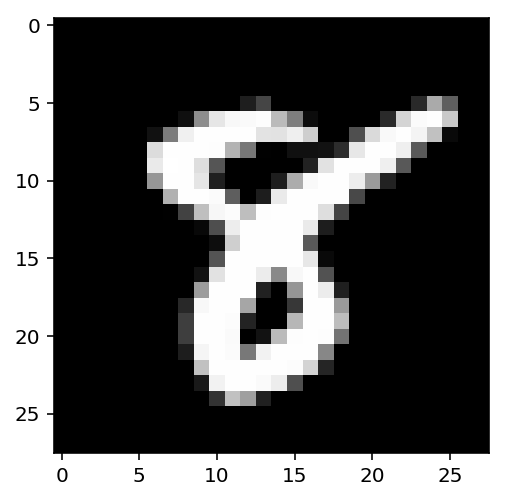

In [43]:
plt.imshow(images[2].numpy().squeeze(), cmap='Greys_r')

## Building networks with PyTorch

Here I'll use PyTorch to build a simple feedfoward network to classify the MNIST images. This network will be trained on the dataset, then we can use it to classify the test images.

To build a neural network with PyTorch, you use the `torch.nn` module. The network itself is a class inheriting from `torch.nn.Module`. You define each of the operations separately, like `nn.Linear(784, 200)` for a fully connected linear layer with 784 inputs and 200 units.

The class needs to include a `forward` method that implements the forward pass through the network. In this method, you pass some input tensor `x` through each of the operations you defined earlier. The `torch.nn` module also has functional equivalents for things like ReLUs in `torch.nn.functional`. This module is usually imported as `F`. Then to use a ReLU activation on some layer (which is just a tensor), you'd do `F.relu(x)`.

So, for this network, I'll build it with three fully connected layers, then a softmax output for predicting classes.

In [44]:
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable

In [45]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 200, 50, 10 units each
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 50)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(50, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        
        return x
    
    def predict(self, x):
        ''' This function for predicts classes by calculating the softmax '''
        logits = self.forward(x)
        return F.softmax(logits)

net = Network()
net

Network (
  (fc1): Linear (784 -> 200)
  (fc2): Linear (200 -> 50)
  (fc3): Linear (50 -> 10)
)

### Initializing weights and biases

The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with `net.fc1.weight` for instance.

In [46]:
print(net.fc1.weight)
print(net.fc1.bias)

Parameter containing:
 3.3264e-02 -7.9339e-03  5.7724e-03  ...   3.7738e-03 -9.6151e-03 -2.3292e-02
 2.0090e-02  2.2167e-02 -6.9689e-03  ...  -3.0251e-03  2.7098e-03  1.9272e-02
 1.6246e-02 -2.5586e-02  1.9203e-03  ...   1.6843e-02 -1.0014e-02 -1.1585e-02
                ...                   ⋱                   ...                
 6.4571e-03  1.6407e-02 -3.4607e-02  ...  -2.8894e-02 -2.9916e-02  2.9006e-02
-3.0395e-02 -1.9366e-02 -1.2421e-02  ...  -2.6520e-02  2.6639e-02  1.5227e-02
-1.7394e-03 -2.4010e-02 -3.2113e-02  ...   7.4121e-03 -2.1844e-02 -3.5535e-03
[torch.FloatTensor of size 200x784]

Parameter containing:
1.00000e-02 *
 -1.1896
 -2.2386
  1.9843
 -2.4376
  0.7572
 -2.8251
  1.9933
 -3.0642
 -0.5655
 -2.1259
 -0.4045
  1.1649
  2.2737
 -0.0310
  0.6883
 -1.3900
 -2.6286
  2.3982
  1.7768
  1.2594
 -1.8605
 -3.4929
  3.3878
 -1.1430
 -0.3664
 -0.4987
 -0.8691
  0.8261
 -3.4407
  3.4405
 -2.9767
  1.8299
 -1.5048
  0.3683
  2.1161
  0.1669
 -2.2223
  3.0264
 -2.0609
  1.5192

For custom initialization, we want to modify these tensors in place. These are actually autograd *Variables*, so we need to get back the actual tensors with `net.fc1.weight.data`. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

In [47]:
# Set biases to all zeros
net.fc1.bias.data.fill_(0)


 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 200]

In [48]:
# sample from random normal with standard dev = 0.01
net.fc1.weight.data.normal_(std=0.01)


 3.1695e-03  1.2845e-03  3.0442e-02  ...  -3.9486e-03  1.5851e-03 -1.4823e-02
 3.5068e-04 -1.3633e-02 -2.1187e-03  ...  -1.6964e-02  1.6373e-03  1.7396e-02
-1.8313e-03 -2.7785e-02 -1.7641e-03  ...   3.4854e-03  4.5554e-03 -6.1380e-03
                ...                   ⋱                   ...                
 2.8676e-03 -2.4962e-04 -1.3215e-03  ...   7.3096e-03  1.3483e-02  7.8936e-03
-4.3441e-03 -8.0730e-05  6.0334e-03  ...  -2.0728e-03  2.2293e-03  1.0356e-02
 9.6312e-03 -8.2562e-04 -8.9345e-03  ...   7.5561e-03 -4.8055e-03  1.4761e-02
[torch.FloatTensor of size 200x784]

## Training the network!

The first thing we need to do for training is define our loss function. In PyTorch, you'll usually see this as `criterion`. Here we're using softmax output, so we want to use `criterion = nn.CrossEntropyLoss()` as our loss. Later when training, you use `loss = criterion(output, targets)` to calculate the actual loss.

We also need to define the optimizer we're using, SGD or Adam, or something along those lines. Here I'll just use SGD with `torch.optim.SGD`, passing in the network parameters and the learning rate.

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

First, let's consider just one learning step before looping through all the data. The general process with PyTorch:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

Below I'll go through one training step and print out the weights and gradients so you can see how it changes.

In [50]:
print('Initial weights - ', net.fc1.weight)

dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(64, 784)

# Create Variables for the inputs and targets
inputs = Variable(images)
targets = Variable(labels)

# Clear the gradients from all Variables
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = net.forward(inputs)
loss = criterion(output, targets)
loss.backward()
print('Gradient -', net.fc1.weight.grad)
optimizer.step()

Initial weights -  Parameter containing:
 3.1695e-03  1.2845e-03  3.0442e-02  ...  -3.9486e-03  1.5851e-03 -1.4823e-02
 3.5068e-04 -1.3633e-02 -2.1187e-03  ...  -1.6964e-02  1.6373e-03  1.7396e-02
-1.8313e-03 -2.7785e-02 -1.7641e-03  ...   3.4854e-03  4.5554e-03 -6.1380e-03
                ...                   ⋱                   ...                
 2.8676e-03 -2.4962e-04 -1.3215e-03  ...   7.3096e-03  1.3483e-02  7.8936e-03
-4.3441e-03 -8.0730e-05  6.0334e-03  ...  -2.0728e-03  2.2293e-03  1.0356e-02
 9.6312e-03 -8.2562e-04 -8.9345e-03  ...   7.5561e-03 -4.8055e-03  1.4761e-02
[torch.FloatTensor of size 200x784]

Gradient - Variable containing:
1.00000e-03 *
-1.0263 -1.0263 -1.0263  ...  -1.0263 -1.0263 -1.0263
 1.4308  1.4308  1.4308  ...   1.4308  1.4308  1.4308
-1.7295 -1.7295 -1.7295  ...  -1.7295 -1.7295 -1.7295
          ...             ⋱             ...          
-1.4472 -1.4472 -1.4472  ...  -1.4472 -1.4472 -1.4472
-0.1837 -0.1837 -0.1837  ...  -0.1837 -0.1837 -0.1837
-0.264

In [51]:
print('Updated weights - ', net.fc1.weight)

Updated weights -  Parameter containing:
 3.1798e-03  1.2948e-03  3.0452e-02  ...  -3.9383e-03  1.5954e-03 -1.4812e-02
 3.3637e-04 -1.3647e-02 -2.1330e-03  ...  -1.6978e-02  1.6230e-03  1.7382e-02
-1.8140e-03 -2.7767e-02 -1.7468e-03  ...   3.5026e-03  4.5727e-03 -6.1207e-03
                ...                   ⋱                   ...                
 2.8821e-03 -2.3515e-04 -1.3071e-03  ...   7.3241e-03  1.3498e-02  7.9081e-03
-4.3423e-03 -7.8893e-05  6.0353e-03  ...  -2.0710e-03  2.2312e-03  1.0358e-02
 9.6338e-03 -8.2297e-04 -8.9319e-03  ...   7.5588e-03 -4.8029e-03  1.4764e-02
[torch.FloatTensor of size 200x784]



### Training for real

Now we'll put this algorithm into a loop so we can go through all the images. This is fairly straightforward. We'll loop through the mini-batches in our dataset, pass the data through the network to calculate the losses, get the gradients, then run the optimizer

In [52]:
net = Network()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [53]:
epochs = 1
steps = 0
running_loss = 0
print_every = 10
for e in range(epochs):
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)

        inputs = Variable(images)
        targets = Variable(labels)
        optimizer.zero_grad()
        
        output = net.forward(inputs)
        loss = criterion(output, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        
        if steps % print_every == 0:
            # Test accuracy
            accuracy = 0
            for ii, (images, labels) in enumerate(testloader):
                
                images = images.resize_(images.size()[0], 784)
                inputs = Variable(images, volatile=True)
                
                predicted = net.predict(inputs).data
                equality = (labels == predicted.max(1)[1])
                accuracy += equality.type_as(torch.FloatTensor()).mean()
            
            print("Epoch: {}/{}".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every),
                  "Test accuracy: {:.4f}".format(accuracy/(ii+1)))
            running_loss = 0

Epoch: 1/1 Loss: 2.1913 Test accuracy: 0.3114
Epoch: 1/1 Loss: 1.8000 Test accuracy: 0.5760
Epoch: 1/1 Loss: 1.3524 Test accuracy: 0.7392
Epoch: 1/1 Loss: 1.0660 Test accuracy: 0.7426
Epoch: 1/1 Loss: 0.8039 Test accuracy: 0.7645
Epoch: 1/1 Loss: 0.8032 Test accuracy: 0.8324
Epoch: 1/1 Loss: 0.6363 Test accuracy: 0.8395
Epoch: 1/1 Loss: 0.5773 Test accuracy: 0.8551
Epoch: 1/1 Loss: 0.5506 Test accuracy: 0.8466
Epoch: 1/1 Loss: 0.4807 Test accuracy: 0.8568
Epoch: 1/1 Loss: 0.4500 Test accuracy: 0.8635
Epoch: 1/1 Loss: 0.5211 Test accuracy: 0.8591
Epoch: 1/1 Loss: 0.4892 Test accuracy: 0.8781
Epoch: 1/1 Loss: 0.4343 Test accuracy: 0.8777
Epoch: 1/1 Loss: 0.4462 Test accuracy: 0.8855
Epoch: 1/1 Loss: 0.4058 Test accuracy: 0.8866
Epoch: 1/1 Loss: 0.3406 Test accuracy: 0.8901
Epoch: 1/1 Loss: 0.4090 Test accuracy: 0.8782
Epoch: 1/1 Loss: 0.4288 Test accuracy: 0.8811
Epoch: 1/1 Loss: 0.4045 Test accuracy: 0.8628
Epoch: 1/1 Loss: 0.4435 Test accuracy: 0.8913
Epoch: 1/1 Loss: 0.4232 Test accur

In [56]:
dataiter = iter(testloader)
images, labels = dataiter.next()

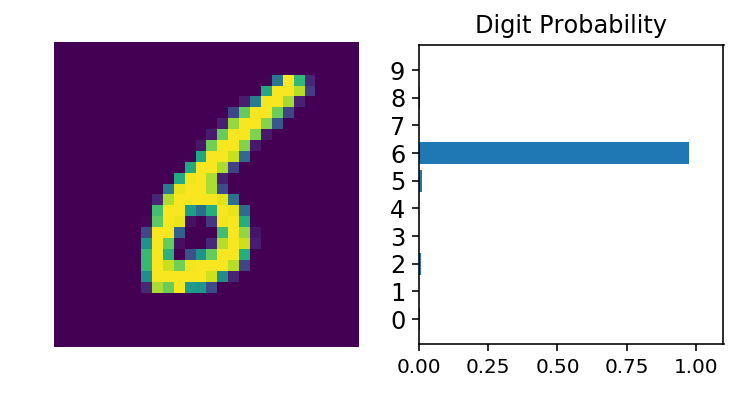

In [72]:
img = images[0]
ps = net.predict(Variable(img.resize_(1, 784)))
helper.view_classify(img.resize_(1, 28, 28), ps)

## Convolutional Networks

Next we'll check out how to build a convolutional network to classify MNIST images. It's pretty much the same as before, but we use `nn.Conv2d` for the convolutional layers and `nn.MaxPool2d` for the max-pooling layer. (Although max-pooling has fallen out of favor recently, but this is traditional so let's stick with it.)

So here I'll build a convolutional network with two convolutional layers, with ReLU activations, and max-pooling after each. The first convolutional layer will have a depth of 10, use a 5x5 kernel, with a stride of 1 (so no downsampling). The second convolutional layer will have a depth of 20, use a 5x5 kernel, and a stride of 1 again. Both layers will have "same" padding, but it's done differently here than in TensorFlow. Instead of saying we want "same" padding and letting the framework pad the input tensors, we define how much padding we want on the tensors. The padding should be set to 2 then, since we are using 5x5 kernels and we want the center of the kernel to lie on the edges of the images. Then, there will be two pixels of the kernel falling over the edge of the images.

We'll flatten the final convolutional layer and pass it to a fully connected layer. We can change the shape of the Variable `x` with `x.view`. This is then passed to the fully connected layer, which then goes to the output layer with 10 units.

In [73]:
class ConvNet(nn.Module):
    def __init__(self, n_conv1=10, n_conv2=20):
        super().__init__()
        
        self.n_conv1, self.n_conv2 = n_conv1, n_conv2
        
        # conv layer with depth n_conv1, 5x5 kernels, and "same" padding
        self.conv1 = nn.Conv2d(1, n_conv1, 5, padding=2)
        # conv layer with depth n_conv2, 5x5 kernels, and "same" padding
        self.conv2 = nn.Conv2d(n_conv1, n_conv2, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        
        # The second convolutional layer will be 7x7x16, fc1 flattens it
        self.fc1 = nn.Linear(n_conv2*7*7, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        # First conv layer, then ReLU, then max-pooling
        x = F.relu(self.pool(self.conv1(x)))
        # Second conv layer, then ReLU, then max-pooling
        x = F.relu(self.pool(self.conv2(x)))
        # Flatten conv layer by reshaping
        x = x.view(-1, self.n_conv2*7*7)
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #x = F.relu(self.fc3(x))
        
        return x
    
    def predict(self, x):
        logits = self.forward(x)
        return F.softmax(logits)

The training code for this is basically the same, except we aren't reshaping the images. You're still running images through the network to calculate the loss, getting the gradients, then updating the parameters. The code below trains the network on your CPU, which takes a bit. Feel free to just run it for a bit, we'll get to using the GPU next.

In [74]:
import time

In [40]:
net = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

trainloader.batch_size = 128

epochs = 1
steps = 0
running_loss = 0
print_every = 20
for e in range(epochs):
    start = time.time()
    for images, labels in iter(trainloader):
        
        steps += 1

        inputs = Variable(images)
        targets = Variable(labels)
        optimizer.zero_grad()
        
        output = net.forward(inputs)
        loss = criterion(output, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        
        if steps % print_every == 0:
            stop = time.time()
            # Test accuracy
            accuracy = 0
            for ii, (images, labels) in enumerate(testloader):
                
                #images = images.resize_(images.size()[0], 784)
                inputs = Variable(images, volatile=True)
                
                predicted = net.predict(inputs).data
                equality = (labels == predicted.max(1)[1])
                accuracy += equality.type_as(torch.FloatTensor()).mean()
            
            print("Epoch: {}/{}..".format(e+1, epochs),
                  "Loss: {:.4f}..".format(running_loss/print_every),
                  "Test accuracy: {:.4f}..".format(accuracy/(ii+1)),
                  "{:.4f} s/batch".format((stop - start)/print_every)
                 )
            running_loss = 0
            start = time.time()

Epoch: 1/1.. Loss: 2.1266.. Test accuracy: 0.5473.. 0.0572 s/batch
Epoch: 1/1.. Loss: 1.2436.. Test accuracy: 0.7634.. 0.0484 s/batch
Epoch: 1/1.. Loss: 0.6640.. Test accuracy: 0.8247.. 0.0500 s/batch
Epoch: 1/1.. Loss: 0.4540.. Test accuracy: 0.8736.. 0.0409 s/batch
Epoch: 1/1.. Loss: 0.3851.. Test accuracy: 0.9046.. 0.0462 s/batch
Epoch: 1/1.. Loss: 0.3399.. Test accuracy: 0.9180.. 0.0547 s/batch
Epoch: 1/1.. Loss: 0.2781.. Test accuracy: 0.9212.. 0.0596 s/batch
Epoch: 1/1.. Loss: 0.2842.. Test accuracy: 0.9283.. 0.0413 s/batch
Epoch: 1/1.. Loss: 0.2330.. Test accuracy: 0.9340.. 0.0491 s/batch
Epoch: 1/1.. Loss: 0.2259.. Test accuracy: 0.9454.. 0.0490 s/batch
Epoch: 1/1.. Loss: 0.1855.. Test accuracy: 0.9539.. 0.0583 s/batch
Epoch: 1/1.. Loss: 0.1790.. Test accuracy: 0.9529.. 0.0353 s/batch
Epoch: 1/1.. Loss: 0.1491.. Test accuracy: 0.9552.. 0.0542 s/batch
Epoch: 1/1.. Loss: 0.1532.. Test accuracy: 0.9607.. 0.0860 s/batch
Epoch: 1/1.. Loss: 0.1495.. Test accuracy: 0.9651.. 0.0450 s/b

## Speeding things up

We can greatly speed up our training by running the matrix operations on a GPU with CUDA. In PyTorch, we do this by sending the tensors to the GPU. First, you set the network to use the GPU with `net.cuda()`. Then, the input and target tensors are sent to the GPU, typically with some flag

```
if cuda == True:
    inputs, targets = inputs.cuda(), targets.cuda()
```

And that's it. The output of the network will again be a tensor on the GPU, so to get it back to the CPU for further operations (such as with Numpy), you use `output = output.cpu()`. Similarly, to set the network back to running on the CPU, use `net.cpu()`.

In [75]:
net = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

net.cuda()

trainloader.batch_size = 128
epochs = 5
steps = 0
running_loss = 0
print_every = 50
for e in range(epochs):
    start = time.time()
    for images, labels in iter(trainloader):
        
        steps += 1

        inputs = Variable(images)
        targets = Variable(labels)
        
        inputs, targets = inputs.cuda(), targets.cuda()
        
        optimizer.zero_grad()
        
        output = net.forward(inputs)
        loss = criterion(output, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        
        if steps % print_every == 0:
            stop = time.time()
            # Test accuracy
            accuracy = 0
            for ii, (images, labels) in enumerate(testloader):
                
                inputs = Variable(images, volatile=True)
                inputs = inputs.cuda()
                
                # Get the class prediction and bring it back to the CPU
                predicted = net.predict(inputs).data.cpu()
                equality = (labels == predicted.max(1)[1])
                accuracy += equality.type_as(torch.FloatTensor()).mean()
            
            print("Epoch: {}/{}..".format(e+1, epochs),
                  "Loss: {:.4f}..".format(running_loss/print_every),
                  "Test accuracy: {:.4f}..".format(accuracy/(ii+1)),
                  "{:.4f} s/batch".format((stop - start)/print_every)
                 )
            running_loss = 0
            start = time.time()

Epoch: 1/5.. Loss: 1.2978.. Test accuracy: 0.8406.. 0.0205 s/batch
Epoch: 1/5.. Loss: 0.3526.. Test accuracy: 0.9323.. 0.0111 s/batch
Epoch: 1/5.. Loss: 0.2165.. Test accuracy: 0.9529.. 0.0111 s/batch
Epoch: 1/5.. Loss: 0.1701.. Test accuracy: 0.9567.. 0.0111 s/batch
Epoch: 1/5.. Loss: 0.1360.. Test accuracy: 0.9645.. 0.0111 s/batch
Epoch: 1/5.. Loss: 0.1349.. Test accuracy: 0.9687.. 0.0111 s/batch
Epoch: 1/5.. Loss: 0.1223.. Test accuracy: 0.9700.. 0.0111 s/batch
Epoch: 1/5.. Loss: 0.1000.. Test accuracy: 0.9682.. 0.0111 s/batch
Epoch: 1/5.. Loss: 0.1094.. Test accuracy: 0.9730.. 0.0111 s/batch
Epoch: 2/5.. Loss: 0.1007.. Test accuracy: 0.9768.. 0.0069 s/batch
Epoch: 2/5.. Loss: 0.0875.. Test accuracy: 0.9767.. 0.0111 s/batch
Epoch: 2/5.. Loss: 0.0810.. Test accuracy: 0.9784.. 0.0111 s/batch
Epoch: 2/5.. Loss: 0.0853.. Test accuracy: 0.9785.. 0.0111 s/batch
Epoch: 2/5.. Loss: 0.0775.. Test accuracy: 0.9802.. 0.0111 s/batch
Epoch: 2/5.. Loss: 0.0679.. Test accuracy: 0.9821.. 0.0111 s/b

## Saving and loading models

Now that we know how to build and train models, we actually need to be able to use these things after training. The general way to do this is building a dictionary with hyperparameters such as sizes of the convolutional layers and such. The parameters and other information needed to rebuild the model are stored in `net.state_dict()`. Then you build a dictionary that looks something like

```python
checkpoint = {'n_conv1': 10,
              'n_conv2': 20,
              'state_dict': model.state_dict()}
```

You save this check point to a file with `torch.save(checkpoint, file_object)`.

Then, to load a checkpoint, use `torch.load`. This loads the whole dictionary so you have the hyperparameters to rebuild the network as well as `state_dict` which contains the values for weights and such.

In [76]:
## Save the model
filename = 'mnist1.ckpt'
checkpoint = {'n_conv1': net.n_conv1,
              'n_conv2': net.n_conv2,
              'state_dict': net.state_dict()}
with open(filename, 'wb') as f:
    torch.save(checkpoint, f)

In [77]:
## Load the model
filename = 'mnist1.ckpt'
with open(filename, 'rb') as f:
        checkpoint = torch.load(f)

model = ConvNet(n_conv1=checkpoint['n_conv1'],
                n_conv2=checkpoint['n_conv2'])
model.load_state_dict(checkpoint['state_dict'])

In [78]:
dataiter = iter(testloader)

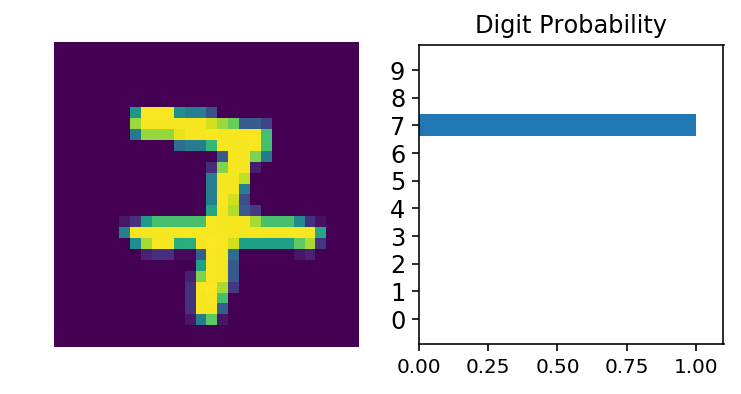

In [85]:
images, labels = dataiter.next()
img = images[0]
ps = model.predict(Variable(img.resize_(1, *img.size())))
helper.view_classify(img, ps)